In [1]:
from fastai.vision.all import *
from pathlib import Path
from fastai.metrics import *
from fastai.interpret import ClassificationInterpretation

In [2]:
# Set the path to your dataset (replace 'path_to_your_dataset' with the actual path)
path = Path('D:/AI Project Guidelines/project 1/data')

In [3]:
# Define data augmentation transforms
aug_transforms = aug_transforms(do_flip=True, flip_vert=False, max_rotate=45.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


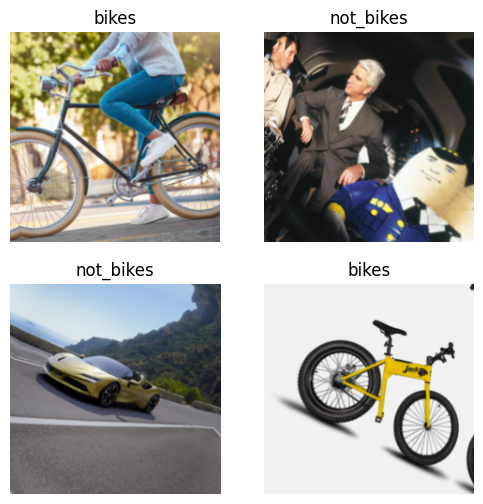

In [4]:
# Define the data loader
data = ImageDataLoaders.from_folder(path, train='train', valid='valid', seed=42, item_tfms=Resize(224), batch_tfms=[*aug_transforms, Normalize.from_stats(*imagenet_stats)], bs=4)
# Assuming you have already created the data object
data.show_batch(max_n=4)

In [5]:
data.vocab

['bikes', 'not_bikes']

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


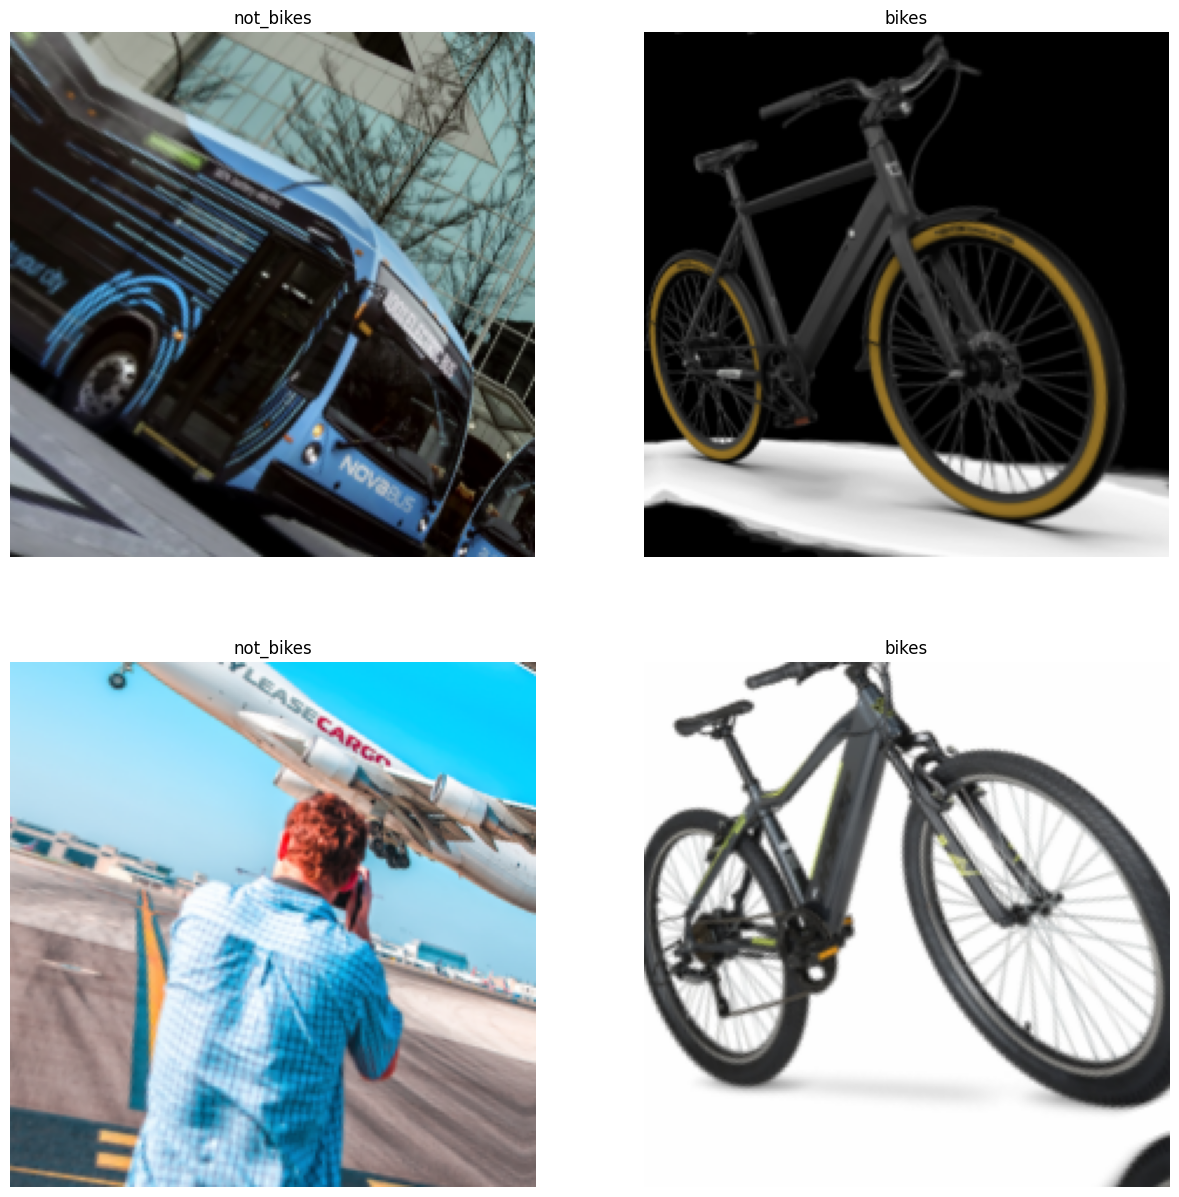

In [6]:
# Visualize a batch of augmented images
data.train.show_batch(max_n=4, nrows=2, figsize=(15, 15))

In [7]:
# Specify metrics as a list of metric functions
metrics = [accuracy, Precision(), Recall(), error_rate]
# Define the model
resnet_learn = vision_learner(data, resnet34, metrics=metrics)

In [8]:
print(resnet_learn.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

SuggestedLRs(valley=0.002511886414140463)

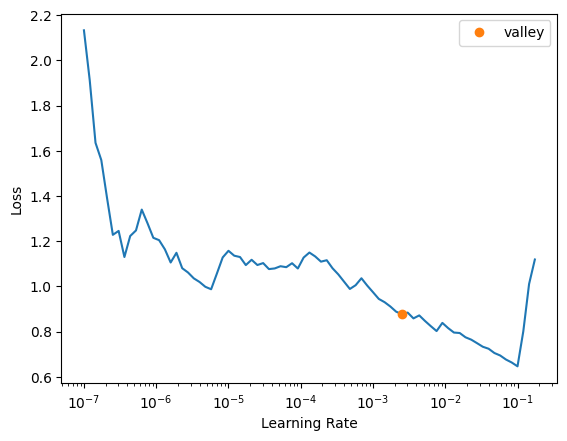

In [9]:
# Find a suitable learning rate
resnet_learn.lr_find()

In [10]:
# Train the resnet model
resnet_learn.fine_tune(4, base_lr=0.002511886414140463)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.547903,0.164161,0.983051,0.967742,1.000000,0.016949,01:45


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.405011,0.081223,0.983051,0.967742,1.000000,0.016949,02:39
1,0.628748,0.158461,0.915254,0.878788,0.966667,0.084746,02:43
2,0.593218,0.045154,1.000000,1.000000,1.000000,0.000000,02:36
3,0.464769,0.072704,0.949153,0.935484,0.966667,0.050847,02:35


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


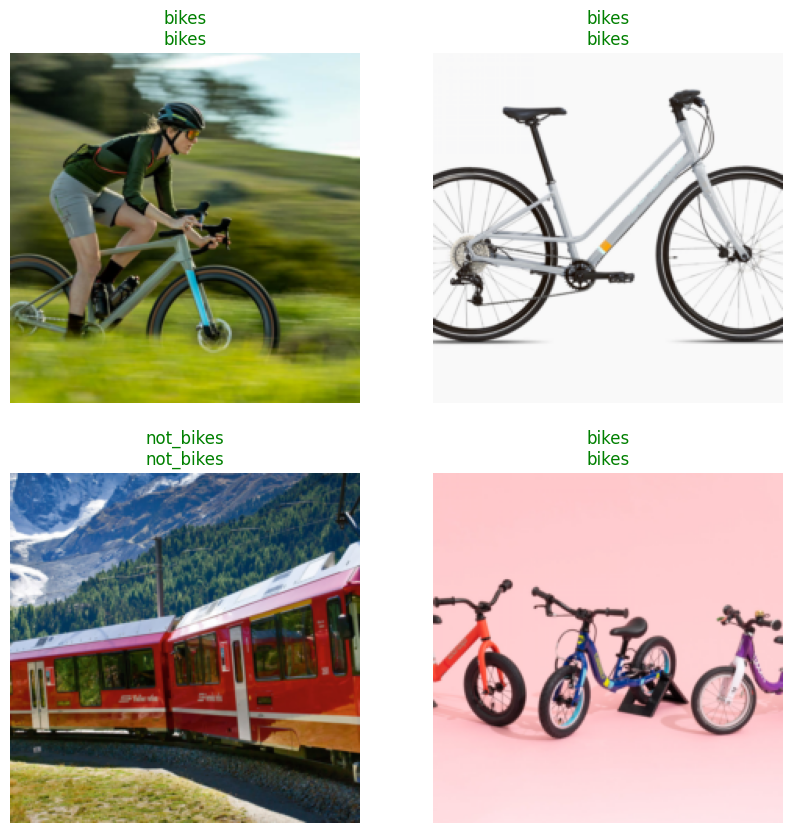

In [11]:
resnet_learn.show_results(max_n=4, figsize=(10, 10))

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


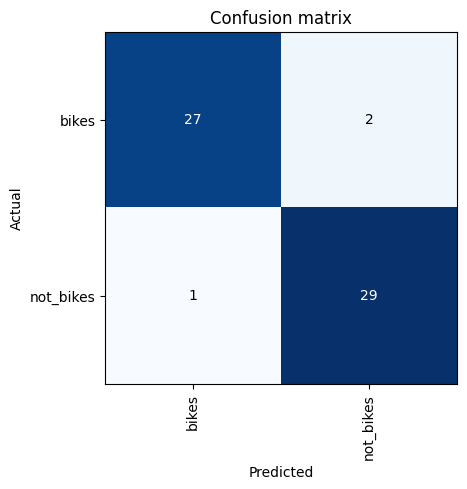

In [16]:
interp = ClassificationInterpretation.from_learner(resnet_learn)
interp.plot_confusion_matrix()

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


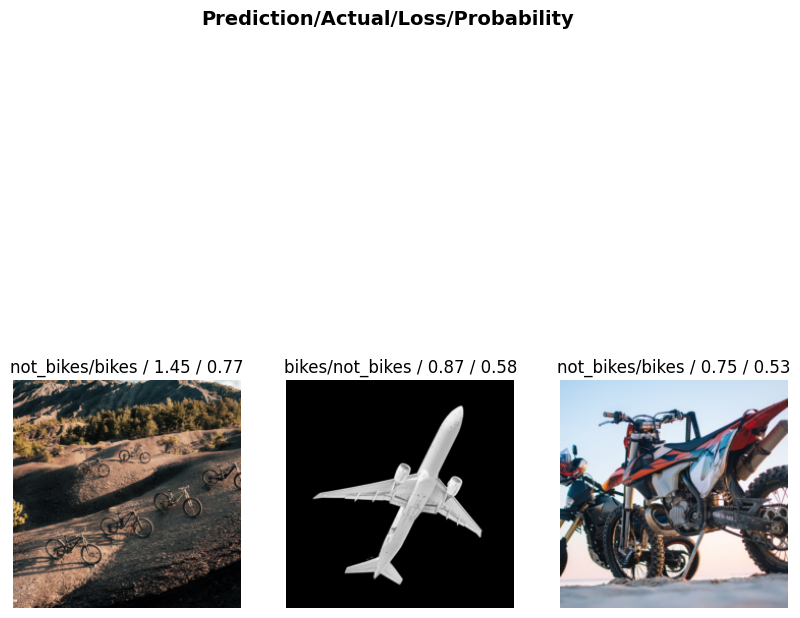

In [18]:
# Assuming 'learn' is your learner
interp = ClassificationInterpretation.from_learner(resnet_learn)

# Plot top losses
interp.plot_top_losses(3, figsize=(10, 10))

In [14]:
# Export the model for inference
resnet_learn.export('D:/AI Project Guidelines/project 1/models/resnet_with_aug.pkl')

In [15]:
# Load the trained model for inference
learn = load_learner('D:/AI Project Guidelines/project 1/models/resnet_with_aug.pkl')

# Make predictions on a new image
img = PILImage.create('D:/AI Project Guidelines/project 1/samples/sample5.jpeg')
prediction, _, _ = learn.predict(img)
print(f'The image is a {prediction}')

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


The image is a bikes
